Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def csv_loader(file_name):
    """
    Reads a CSV using unicodecsv module and returns a list
    """
    with open(file_name, "rb") as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = csv_loader("daily_engagement.csv")
print(daily_engagement[0])
project_submissions = csv_loader("project_submissions.csv")
print(project_submissions[0])

{'utc_date': '2015-01-09', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'lessons_completed': '0.0', 'acct': '0', 'num_courses_visited': '1.0'}
{'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'completion_date': '2015-01-16', 'creation_date': '2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# Part 1
print(
    len(enrollments),
    len(daily_engagement),
    len(project_submissions)
    )



1640 136240 3642


In [14]:
# Part 2
def get_unique_students(file_name):
    """
    Retrieves a list of unique account keys from the specified file
    """
    unqiue_students = set()
    for e in file_name:
        unqiue_students.add(e["account_key"])
    return unqiue_students
                            
u_enrollments = get_unique_students(enrollments)
u_daily_engagement = get_unique_students(daily_engagement)
u_project_submissions = get_unique_students(project_submissions)

In [15]:
print(
    len(u_enrollments),
    len(u_daily_engagement),
    len(u_project_submissions)
    )

1302 1237 743


## Problems in the Data

In [13]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

KeyError: 'acct'

## Missing Engagement Records

In [16]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for e in enrollments:
    if e["account_key"] not in u_daily_engagement:
        print("\n", e)


 {'is_udacity': False, 'status': 'canceled', 'account_key': '1219', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True}

 {'is_udacity': False, 'status': 'canceled', 'account_key': '871', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), 'join_date': datetime.datetime(2014, 11, 13, 0, 0), 'is_canceled': True}

 {'is_udacity': False, 'status': 'canceled', 'account_key': '1218', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), 'join_date': datetime.datetime(2014, 11, 15, 0, 0), 'is_canceled': True}

 {'is_udacity': False, 'status': 'canceled', 'account_key': '654', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), 'join_date': datetime.datetime(2014, 12, 4, 0, 0), 'is_canceled': True}

 {'is_udacity': False, 'status': 'canceled', 'account_key': '654', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 12, 4, 0

## Checking for More Problem Records

In [18]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

for ix, e in enumerate(enrollments):
    if e["account_key"] not in u_daily_engagement and e["join_date"] != e["cancel_date"]:
        print("\n", "Index: %i" % ix, "\n Correspoinding record: \n %s" % e)


 Index: 467 
 Correspoinding record: 
 {'is_udacity': True, 'status': 'canceled', 'account_key': '1304', 'days_to_cancel': 59, 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'is_canceled': True}

 Index: 468 
 Correspoinding record: 
 {'is_udacity': True, 'status': 'canceled', 'account_key': '1304', 'days_to_cancel': 99, 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_canceled': True}

 Index: 1378 
 Correspoinding record: 
 {'is_udacity': True, 'status': 'current', 'account_key': '1101', 'days_to_cancel': None, 'cancel_date': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'is_canceled': False}


## Tracking Down the Remaining Problems

In [19]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [20]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [21]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(
    len(non_udacity_enrollments),
    len(non_udacity_engagement),
    len(non_udacity_submissions))

1622 135656 3634


## Refining the Question

In [22]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict()

for e in non_udacity_enrollments:
    # check wether days_to_cancel == None or days_to_cancel > 7
    if e["days_to_cancel"] == None or e["days_to_cancel"] > 7:
        # store account key and join date in temporary variables
        temp_key = e["account_key"]
        temp_date = e["join_date"]
        # check wether account key already exists in temp variable or if join date > existing join date
        if temp_key not in paid_students or temp_date > paid_students[temp_key]:
            # add account_key and enrollment_date to
            paid_students[temp_key] = temp_date
        
len(paid_students)

995

## Getting Data from First Week

In [23]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [24]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [25]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

# loop over engagements
for e in non_udacity_engagement:
    # check if student is in paid students and if engagement date is valid
    if e["account_key"] in paid_students and within_one_week(paid_students[e["account_key"]], e["utc_date"]) == True:
        paid_engagement_in_first_week.append(e)
    
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [26]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [27]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [28]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [29]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

for k,v in total_minutes_by_account.items():
    if v > 7200:
        print("\n", "account key: ", k, "value: ", v)

In [30]:
print(
    paid_engagement_in_first_week["account_key" == 460],
    paid_engagement_in_first_week["account_key" == 140],
    paid_engagement_in_first_week["account_key" == 108],
    paid_engagement_in_first_week["account_key" == 78]
)

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'account_key': '0', 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'lessons_completed': 0, 'num_courses_visited': 1} {'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'account_key': '0', 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'lessons_completed': 0, 'num_courses_visited': 1} {'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'account_key': '0', 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'lessons_completed': 0, 'num_courses_visited': 1} {'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'account_key': '0', 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'lessons_completed': 0, 'num_courses_visited': 1}


## Lessons Completed in First Week

Mean: 1.636181 Standard deviation: 3.002561 Min: 0.000000 Max: 36.000000


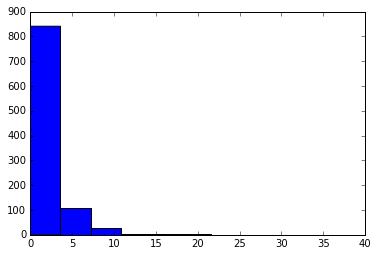

In [59]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def group_data(data, key_name):
    """
    Given data in dict form and a key, the function returns a grouped data set
    """
    grouped_data = defaultdict(list)
    
    for e in data:
        key = e[key_name]
        grouped_data[key].append(e)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")

def sum_grouped_data(data, field_name):
    """
    Given data in dict form and a field name, the function returns sum of the field name per key
    """
    summed_data = {}
    
    for key, values in data.items():
        total = 0
        for value in values:
            total += value[field_name]
        summed_data[key] = total
    return summed_data

total_lessons_per_account = sum_grouped_data(engagement_by_account, "lessons_completed")
    
def describe_data(data):
    """
    Given a dataset the function returns mean, std. deviation, min and max
    """
    print(
        "Mean: %f" % np.mean(data),
        "Standard deviation: %f" % np.std(data),
        "Min: %f" % np.min(data),
        "Max: %f" % np.max(data))
    plt.hist(data)
    
describe_data(list(total_lessons_per_account.values()))

## Number of Visits in First Week

In [32]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for el in paid_engagement_in_first_week:
    if el["num_courses_visited"] > 0:
        el["has_visited"] = 1
    else:
        el["has_visited"] = 0

In [33]:
engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")
total_visits_per_day_per_account = sum_grouped_data(engagement_by_account, "has_visited")
describe_data(list(total_visits_per_day_per_account.values()))

Mean: 2.867337 Standard deviation: 2.255198 Min: 0.000000 Max: 7.000000


## Splitting out Passing Students

In [34]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

# loop over project submission data
for el in paid_submissions:

    # check if project submission account key is in engagement data
    if el["account_key"] in paid_engagement:

        print(e["account_key"])
        
        # check if lesson key is in subway_project_lesson key
        if el["lesson_key"]  in subway_project_lesson_keys:
            
            print(e["lesson_key"])
    
            # check if assigned_rating is PASSED or DISTINCTION
            if el["assigned_rating"]  in ["PASSED", "DISTINCTION"]:
                
                print(e["assigned_rating"])
                
                # if so, add record to passing_engagement list
                passing_engagement.append(el)
        
            # else add record to non_passing_engagement list
            else:
                non_passing_engagement.append(el)
                
print("Passing: ", len(passing_engagement), "Not passing: ", len(non_passing_engagement)) 

Passing:  0 Not passing:  0


In [35]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for el in paid_submissions: 
    if ((el["lesson_key"] in subway_project_lesson_keys) and
            (el["assigned_rating"] == 'PASSED' or el["assigned_rating"] == 'DISTINCTION')):
        pass_subway_project.add(el['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for el in paid_engagement_in_first_week:
    if el['account_key'] in pass_subway_project:
        passing_engagement.append(el)
    else:
        non_passing_engagement.append(el)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [41]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# prepare passing data
passing_engagement_grouped = group_data(passing_engagement, "account_key")
non_passing_engagement_grouped = group_data(non_passing_engagement, "account_key")

passing_minutes = sum_grouped_data(passing_engagement_grouped, "total_minutes_visited")
passing_lessons = sum_grouped_data(passing_engagement_grouped, "lessons_completed")
passing_days = sum_grouped_data(passing_engagement_grouped, "has_visited")
passing_projects = sum_grouped_data(passing_engagement_grouped, "projects_completed")

# prepare non passing data
non_passing_minutes = sum_grouped_data(non_passing_engagement_grouped, "total_minutes_visited")
non_passing_lessons = sum_grouped_data(non_passing_engagement_grouped, "lessons_completed")
non_passing_days = sum_grouped_data(non_passing_engagement_grouped, "has_visited")
non_passing_projects = sum_grouped_data(non_passing_engagement_grouped, "projects_completed")

# compare
print("Minutes", "\n")
describe_data(list(passing_minutes.values()))
describe_data(list(non_passing_minutes.values()))

print("\n", "Lessons", "\n")
describe_data(list(passing_lessons.values()))
describe_data(list(non_passing_lessons.values()))

print("\n", "Days", "\n")
describe_data(list(passing_days.values()))
describe_data(list(non_passing_days.values()))

print("\n", "Projects", "\n")
describe_data(list(passing_projects.values()))
describe_data(list(non_passing_projects.values()))

Minutes 

Mean: 394.586046 Standard deviation: 448.499519 Min: 0.000000 Max: 3564.733264
Mean: 143.326474 Standard deviation: 269.538619 Min: 0.000000 Max: 1768.522749

 Lessons 

Mean: 2.052550 Standard deviation: 3.142227 Min: 0.000000 Max: 36.000000
Mean: 0.862069 Standard deviation: 2.549160 Min: 0.000000 Max: 27.000000

 Days 

Mean: 3.384853 Standard deviation: 2.258821 Min: 0.000000 Max: 7.000000
Mean: 1.905172 Standard deviation: 1.905731 Min: 0.000000 Max: 7.000000

 Projects 

Mean: 0.009274 Standard deviation: 0.110810 Min: 0.000000 Max: 2.000000
Mean: 0.000000 Standard deviation: 0.000000 Min: 0.000000 Max: 0.000000


In [37]:
passing_engagement[0:2]

[{'account_key': '0',
  'has_visited': 1,
  'lessons_completed': 0,
  'num_courses_visited': 1,
  'projects_completed': 0,
  'total_minutes_visited': 11.6793745,
  'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': '0',
  'has_visited': 1,
  'lessons_completed': 0,
  'num_courses_visited': 2,
  'projects_completed': 0,
  'total_minutes_visited': 37.2848873333,
  'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}]

## Making Histograms

In [51]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

# setup
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

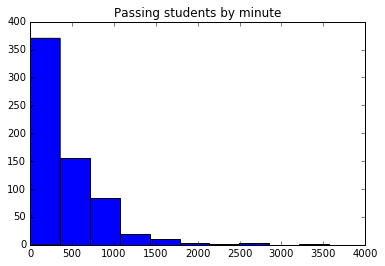

In [52]:
# minutes passing
plt.title("Passing students by minute")
plt.hist(list(passing_minutes.values()))

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

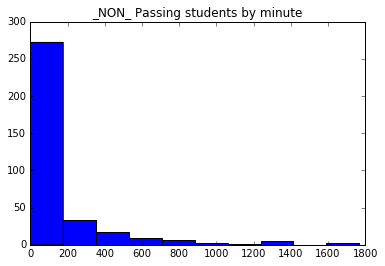

In [53]:
# minutes non-passing
plt.title("_NON_ Passing students by minute")
plt.hist(list(non_passing_minutes.values()))

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

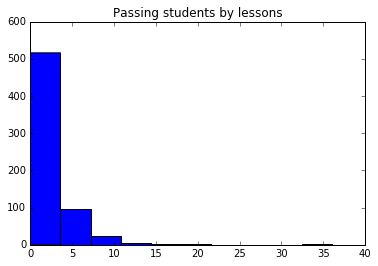

In [54]:
# lessons
plt.title("Passing students by lessons")
plt.hist(list(passing_lessons.values()))

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

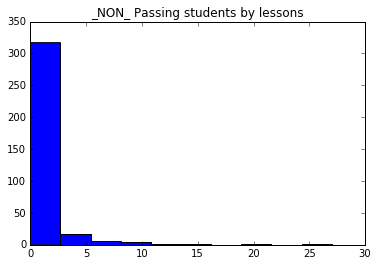

In [55]:
# lessons non-passing
plt.title("_NON_ Passing students by lessons")
plt.hist(list(non_passing_lessons.values()))

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

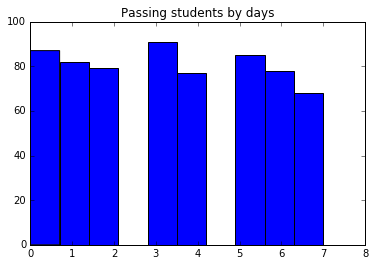

In [61]:
# days
plt.title("Passing students by days")
plt.hist(list(passing_days.values()))

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

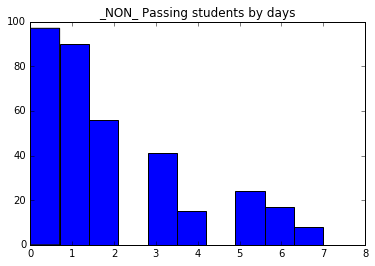

In [57]:
# days non-passing
plt.title("_NON_ Passing students by days")
plt.hist(list(non_passing_days.values()))

## Improving Plots and Sharing Findings

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

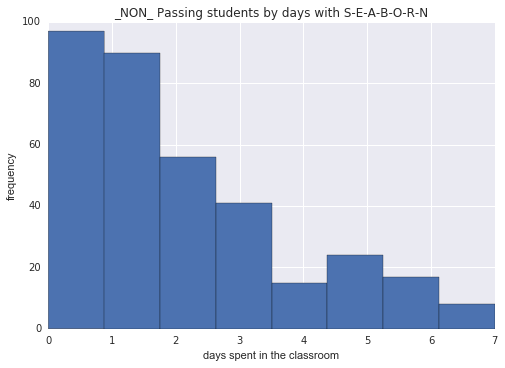

In [64]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

# seaborn only
plt.title("_NON_ Passing students by days with S-E-A-B-O-R-N")
plt.xlabel("days spent in the classroom")
plt.ylabel("frequency")
plt.hist(list(non_passing_days.values()), bins=8)